## PCA

Применить PCA трехмерным данным по оттоку, которые содержатся в файле `data/client_segmentation.csv`. В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:
* call_diff доля звонков
* sms_diff доля смс
* доля интернет-трафика traffic_diff

Все показатели вычисляются по формуле

$$
\frac{\text{new_value}-\text{old_value}}{\text{old_value}}
$$

В последней колонке customes_class содержится метка по оттоку:
* $0$ - активный пользователя
* $1$ - "спящий" пользователь (редко пользуется услугами)
* $2$ - пользователь, который ушел в отток

Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

загружаем датасет в память

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('client_segmentation.csv')
x = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head()

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0


## **В рамках задания**

1. Визуализируйте первый и третий столбец из набора данных `call_diff` и`traffic_diff` в виде scatter
2. Постройте PCA  сожмите их до одномерного случая, визуализируйте результат


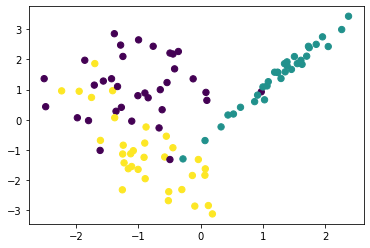

In [5]:
plt.scatter(df_source.loc[:, 'call_diff'], df_source.loc[:, 'traffic_diff'], s = 40, c=df_source['customes_class'], marker='o')
plt.show()

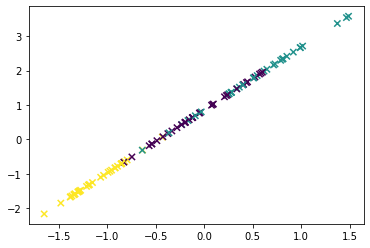

In [13]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_model = pca.fit(x)
x_pca = pca.transform(x)
x_new = pca.inverse_transform(x_pca)

plt.scatter(x_new[:, 0], x_new[:, 2], s = 40, c=y, marker='x')
plt.show()



Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности $n=2$.

Для наглядности и визуализируем наши трёхмерные данные в 3D:

C:\Users\Орлан\AppData\Local\Temp\ipykernel_7356\3848350945.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()


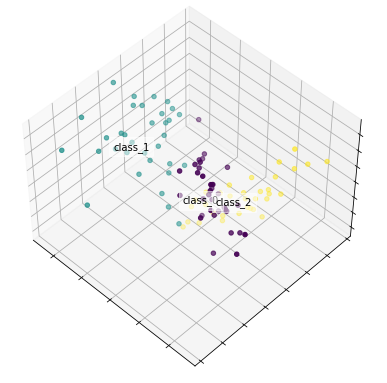

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
# и визуализируем их
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134); plt.cla()
num_labels = np.unique(y).size
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
        X[y == label, 2].mean(), name, horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([]); ax.w_zaxis.set_ticklabels([])
plt.show()

С помощью класса `sklearn.decomposition.PCA` выполните понижение размерности признакового пространства  с $n=3$ до $n=2$ и снова визуализируйте данные. Картинка должна получится примерно такая:
![classification_dim_reduction](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/classification_dim_reduction.png)

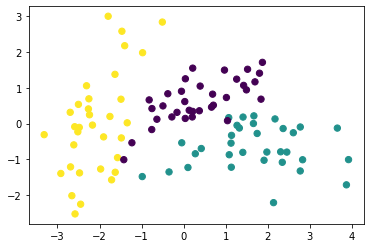

In [28]:
pca_1 = PCA(n_components=2)
pca_1_model = pca_1.fit(x)
x_pca_1 = pca_1.transform(x)

plt.scatter(x_pca_1[:, 0], x_pca_1[:, 1], s = 40, c=y, marker='o')
plt.show()